<body>
    <div style="padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center":><h1>2023 Data Science Jobs Salaries</h1></div>
</body>


<body>
    <div style="padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center":><h2>📊 Load libraries and Data</h2></div>
</body>


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import shap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# import missingno as mno
import plotly.offline as pyo 
import plotly.figure_factory as ff
import plotly.io as pio

import country_converter as coco
import warnings


In [5]:
import pandas as pd

original_df = pd.read_csv('./archive/ds_salaries.csv')
original_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


- 직업 분류 

In [6]:
# 직업과 해당 범주를 딕셔너리로 매핑
job_category_mapping = {
    'Data Scientist': '데이터 사이언티스트',
    'Applied Scientist': '데이터 사이언티스트',
    'Research Scientist': '데이터 사이언티스트',
    'Applied Data Scientist': '데이터 사이언티스트',
    'Staff Data Scientist': '데이터 사이언티스트',
    'Product Data Scientist': '데이터 사이언티스트',
    'Principal Data Scientist' : '데이터 사이언티스트',
    'Lead Data Scientist' : '데이터 사이언티스트',
    'Data Science Lead' : '데이터 사이언티스트',
    'Data Science Consultant' : '데이터 사이언티스트',
    'Data Science Engineer' : '데이터 사이언티스트',
    'Data Science Tech Lead' : '데이터 사이언티스트',
    'Data Scientist Lead' : '데이터 사이언티스트',

    'ML Engineer': '머신 러닝 엔지니어',
    'Machine Learning Engineer': '머신 러닝 엔지니어',
    'Applied Machine Learning Engineer': '머신 러닝 엔지니어',
    'Machine Learning Research Engineer': '머신 러닝 엔지니어',
    'Principal Machine Learning Engineer': '머신 러닝 엔지니어',
    'Lead Machine Learning Engineer': '머신 러닝 엔지니어',
    'Machine Learning Manager': '머신 러닝 엔지니어',
    'Machine Learning Developer': '머신 러닝 엔지니어',
    'Machine Learning Infrastructure Engineer': '머신 러닝 엔지니어',
    'Machine Learning Researcher': '머신 러닝 엔지니어',
    'MLOps Engineer': '머신 러닝 엔지니어',
    'Research Engineer' : '머신 러닝 엔지니어',
    'Machine Learning Scientist' : '머신러닝 엔지니어',
    'Applied Machine Learning Scientist' : '머신러닝 엔지니어',
    'Machine Learning Software Engineer' : '머신러닝 엔지니어',


    'Marketing Data Engineer': '데이터 엔지니어',
    'Data Engineer': '데이터 엔지니어',
    'ETL Engineer': '데이터 엔지니어',
    'Data DevOps Engineer': '데이터 엔지니어',
    'Cloud Database Engineer': '데이터 엔지니어',
    'Azure Data Engineer': '데이터 엔지니어',
    'Cloud Data Engineer': '데이터 엔지니어',
    'ETL Developer': '데이터 엔지니어',
    'Cloud Data Architect': '데이터 엔지니어',
    'Lead Data Engineer': '데이터 엔지니어',
    'Principal Data Engineer': '데이터 엔지니어',
    'Analytics Engineer' : '데이터 엔지니어',
    'Director of Data Science' : '데이터 엔지니어',
    'Data Specialist' : '데이터 엔지니어',
    'Data Infrastructure Engineer' : '데이터 엔지니어',
    'Software Data Engineer' : '데이터 엔지니어',

    'Data Analyst': '비즈니스 인텔리전스 및 분석',
    'Data Analytics Manager': '비즈니스 인텔리전스 및 분석',
    'Business Data Analyst': '비즈니스 인텔리전스 및 분석',
    'BI Data Engineer': '비즈니스 인텔리전스 및 분석',
    'BI Developer': '비즈니스 인텔리전스 및 분석',
    'BI Data Analyst': '비즈니스 인텔리전스 및 분석',
    'BI Analyst': '비즈니스 인텔리전스 및 분석',
    'Data Analytics Specialist': '비즈니스 인텔리전스 및 분석',
    'Data Analytics Engineer': '비즈니스 인텔리전스 및 분석',
    'Data Analytics Consultant': '비즈니스 인텔리전스 및 분석',
    'Power BI Developer': '비즈니스 인텔리전스 및 분석',
    'Business Intelligence Engineer' : '비즈니스 인텔리전스 및 분석',
    
    'NLP Engineer': '자연어 처리 및 음성 처리',
    
    'Computer Vision Engineer': '컴퓨터 비전(CV) 종사자',
    'Computer Vision Software Engineer': '컴퓨터 비전(CV) 종사자',
    '3D Computer Vision Researcher': '컴퓨터 비전(CV) 종사자',

    'Deep Learning Researcher': '딥 러닝 엔지니어',
    'Deep Learning Engineer': '딥 러닝 엔지니어',

    'Big Data Engineer': '빅 데이터 분석가',
    'Big Data Architect': '빅 데이터 분석가',

    'Data Architect': '데이터 아키텍터',
    'Principal Data Architect': '데이터 아키텍터',

    'Data Quality Analyst': '데이터 관리 및 운영',
    'Compliance Data Analyst': '데이터 관리 및 운영',
    'Data Operations Engineer': '데이터 관리 및 운영',
    'Data Management Specialist': '데이터 관리 및 운영',
    'Data Operations Analyst': '데이터 관리 및 운영',
    'Manager Data Management' : '데이터 관리 및 운영',

    'Insight Analyst': '인사이트 분석',
    
    'Marketing Data Analyst': '데이터 분석가',
    'Product Data Analyst': '데이터 분석가',
    'Financial Data Analyst': '데이터 분석가',
    'Finance Data Analyst': '데이터 분석가',
    'Data Modeler' : '데이터 분석가',
    'Staff Data Analyst' : '데이터 분석가',
    'Lead Data Analyst' : '데이터 분석가',
    'Data Analytics Lead' : '데이터 분석가',
 
    'AI Developer': '인공 지능 개발자',
    'AI Scientist': '인공 지능 개발자',
    'AI Programmer' : '인공 지능 개발자',

    'Autonomous Vehicle Technician': '자율 주행 자동차 엔지니어',

    'Data Strategist': '데이터 전략가 및 리더',
    'Head of Data': '데이터 전략가 및 리더',
    'Data Science Manager': '데이터 전략가 및 리더',
    'Data Manager': '데이터 전략가 및 리더',
    'Head of Data Science': '데이터 전략가 및 리더',
    'Data Lead': '데이터 전략가 및 리더',
    'Head of Machine Learning': '데이터 전략가 및 리더',
    'Principal Data Analyst': '데이터 전략가 및 리더',
    'Staff Data Scientist': '데이터 전략가 및 리더'
}


In [7]:
len(job_category_mapping) == len(original_df['job_title'].unique())

True

In [8]:
original_df['jobs'] = original_df['job_title'].apply(lambda x : job_category_mapping[x])
original_df['jobs']

0            데이터 사이언티스트
1            머신 러닝 엔지니어
2            머신 러닝 엔지니어
3            데이터 사이언티스트
4            데이터 사이언티스트
             ...       
3750         데이터 사이언티스트
3751         데이터 사이언티스트
3752         데이터 사이언티스트
3753    비즈니스 인텔리전스 및 분석
3754       데이터 전략가 및 리더
Name: jobs, Length: 3755, dtype: object

<li>1. work_year: The year the salary was paid.</li>
<li>2. experience_level: The experience level in the job during the year</li>
<li>3. employment_type: The type of employment for the role</li>
<li>4. job_title: The role worked in during the year.</li>
<li>5. salary: The total gross salary amount paid.</li>
<li>6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.</li>
<li>7. salaryinusd: The salary in USD</li>
<li>8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.</li>
<li>9. remote_ratio: The overall amount of work done remotely</li>
<li>10. company_location: The country of the employer's main office or contracting branch</li>
<li>11. company_size: The median number of people that worked for the company during the year</li>

In [9]:
original_df = original_df.drop(['salary','salary_currency'], axis=1)
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
 9   jobs                3755 non-null   object
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [10]:
original_df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


SE - Software Engineer: 소프트웨어 엔지니어로, 소프트웨어 개발과 관련된 업무를 수행하는 전문가를 나타냅니다. 이 포지션은 일반적으로 소프트웨어 개발자나 엔지니어로도 알려져 있습니다.

MI - Mid-level: 중간 레벨로, 경력이 어느 정도 있는 직원을 나타냅니다. 이 사람들은 경력의 중간 단계에 있으며, 일반적으로 주어진 업무에 능숙하게 대응할 수 있는 능력을 갖추고 있습니다.

EN - Entry-level: 입문 레벨로, 새로운 직원이나 프로페셔널이 처음으로 해당 분야에 입문하는 단계를 나타냅니다. 이 사람들은 아직 경력이 부족하거나 훈련이 필요한 단계에 있습니다.

EX - Experienced: 경험이 풍부한 레벨로, 해당 분야에서 오랜 경력을 가진 전문가를 나타냅니다. 이러한 사람들은 자신의 분야에서 높은 수준의 전문 지식과 경험을 가지고 있으며, 복잡한 프로젝트나 리더십 역할을 맡을 수 있습니다.

In [11]:
original_df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

FT - Full-Time: 정규직 또는 전체 근로 시간으로, 한 주에 일반적으로 40 시간 이상을 근무하는 고용 형태를 나타냅니다. 정규직으로 고용된 직원은 회사에서 정규적으로 근무하며 복리후생 혜택을 받을 수 있습니다.

CT - Contract: 계약직으로, 특정 기간 동안 또는 프로젝트를 위해 고용되는 형태를 나타냅니다. 계약직 직원은 보통 고용 기간이 정해져 있으며 프로젝트 완료 후에 일반적으로 고용 계약이 종료됩니다.

FL - Freelance: 프리랜서 또는 자율 고용으로, 독립적인 전문가나 자영업자가 프로젝트 또는 일을 수행하는 형태를 나타냅니다. 프리랜서는 종종 여러 고객과 계약을 맺고 독립적으로 작업하며, 고용주와의 정규 고용 관계가 없습니다.

PT - Part-Time: 파트타임 또는 비정규직으로, 정규 근로 시간보다 적은 시간을 근무하는 고용 형태를 나타냅니다. 파트타임 직원은 주로 저녁이나 주말과 같은 일부 시간에 근무하며, 정규직 직원보다 적은 근로 시간을 가집니다.

In [12]:
print(original_df['employment_type'].unique(),'\n')
print(original_df['employee_residence'].unique(),'\n')
print(original_df['salary_in_usd'].unique(),'\n')
print(original_df['job_title'].unique(),'\n')

['FT' 'CT' 'FL' 'PT'] 

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT'] 

[ 85847  30000  25500 ...  28369 412000  94665] 

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer'

In [13]:
original_df['residence_continent']=original_df['employee_residence']

In [14]:
original_df['residence_continent']=original_df['residence_continent'].replace(( 'AS', 'CA', 'CR', 'DO', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'PR', 'US'), "North America")
original_df['residence_continent']=original_df['residence_continent'].replace(('NG', 'GH', 'KE', 'ZA', 'DZ', 'EG', 'MA','TN','CF'), "Africa")
original_df['residence_continent']=original_df['residence_continent'].replace(('CN', 'HK', 'IN', 'IL', 'IR', 'IQ', 'JP', 'KW', 'KZ', 'MY', 'PH', 'PK', 'SA', 'SG', 'KR', 'AE', 'TH', 'TR', 'UZ', 'VN','AM','ID', ), "Asia")
original_df['residence_continent']=original_df['residence_continent'].replace(('AU', 'NZ','AS'), "Australia")
original_df['residence_continent']=original_df['residence_continent'].replace(('AL', 'AT', 'BE', 'BA', 'BG', 'HR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'GB', 'UA', 'RU', 'CY','MK','JE','MD'), "Europe")
original_df['residence_continent']=original_df['residence_continent'].replace(('AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'PY', 'PE', 'UY', 'VE'), "South America")

In [15]:
original_df['residence_continent'].unique()

array(['Europe', 'North America', 'Africa', 'Asia', 'Australia',
       'South America'], dtype=object)

In [16]:
original_df['Country_Grouped'] = original_df['employee_residence'].apply(lambda x: x if x in ['US', 'GB', 'CA', 'ES', 'IN'] else 'Others')
original_df['Company_Grouped'] = original_df['company_location'].apply(lambda x: x if x in ['US', 'GB', 'CA', 'ES', 'IN'] else 'Others')
# original_df['Salary_Grouped'] = original_df['salary_currency'].apply(lambda x: x if x in ['USD', 'EUR', 'GBP', 'INR', 'CAD'] else 'Others')

- 가독성을 위한 라벨링


In [17]:
original_df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [18]:
original_df['experience_level'] = original_df['experience_level'].replace('EN', 'Junior')
original_df['experience_level'] = original_df['experience_level'].replace('MI', 'Senior')
original_df['experience_level'] = original_df['experience_level'].replace('SE', 'Expert')
original_df['experience_level'] = original_df['experience_level'].replace('EX', 'Director')

original_df['employment_type'] = original_df['employment_type'].replace('FT', ' Full-Time')
original_df['employment_type'] = original_df['employment_type'].replace('CT', ' Contract')
original_df['employment_type'] = original_df['employment_type'].replace('FL', ' Freelance')
original_df['employment_type'] = original_df['employment_type'].replace('PT', ' Part-Time')

- 고용 인구 거주지

In [19]:
original_df['employee_residence'] = coco.convert(original_df['employee_residence'], to='ISO3')

residence = original_df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    
                    color_continuous_scale=px.colors.sequential.Agsunset,
                    template='simple_white',
                    title='Employee Residence Distribution Map')

fig.show()

- `Object` variable 분포 확인

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCours

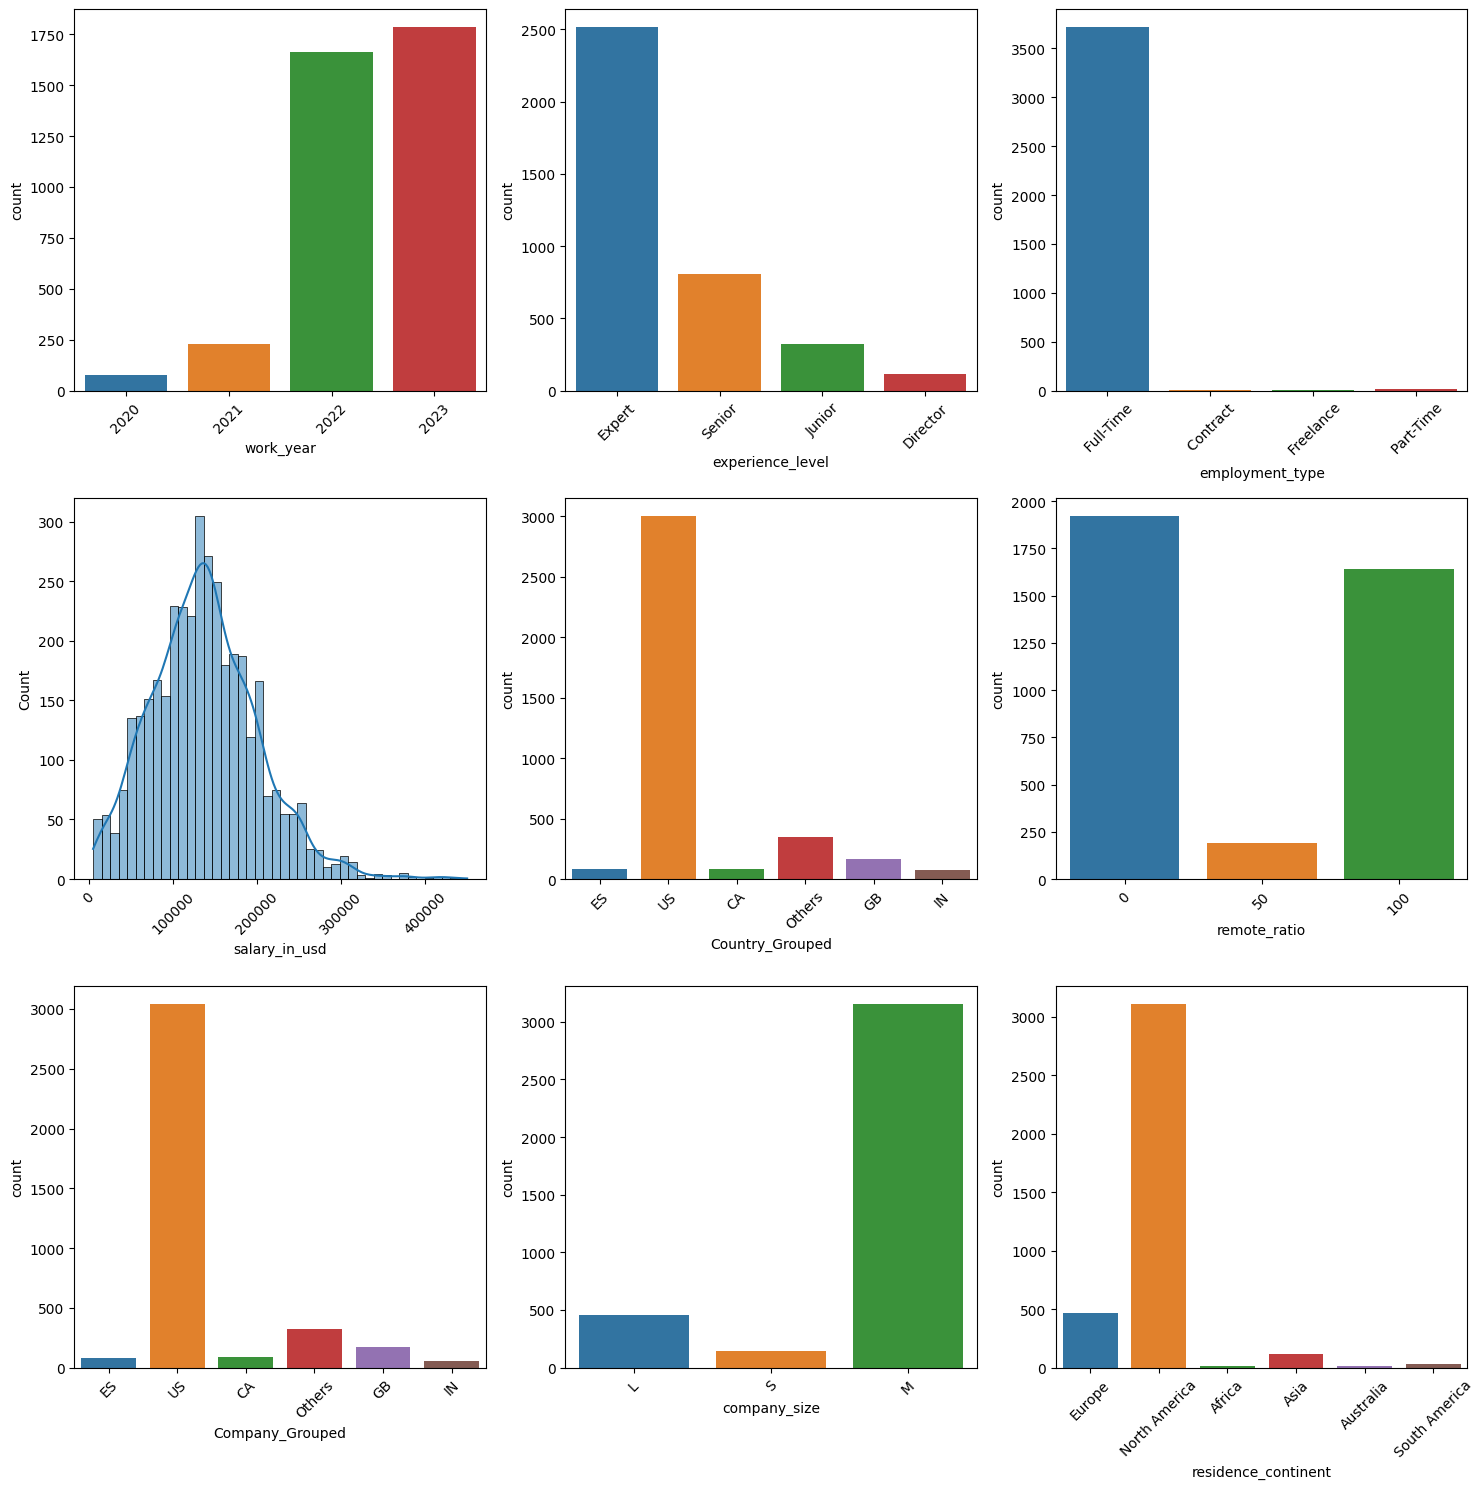

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3,3, figsize=(15,15))
for row in ax:
    for subplot in row:
        subplot.tick_params(axis='x', labelrotation=45)
sns.countplot(original_df, x='work_year', ax=ax[0,0])
sns.countplot(original_df, x='experience_level', ax=ax[0,1])
sns.countplot(original_df, x='employment_type', ax=ax[0,2])
sns.histplot(original_df, x='salary_in_usd', kde=True, ax=ax[1,0])
sns.countplot(original_df, x='Country_Grouped', ax=ax[1,1])
sns.countplot(original_df, x='remote_ratio', ax=ax[1,2])
sns.countplot(original_df, x='Company_Grouped', ax=ax[2,0])
sns.countplot(original_df, x='company_size', ax=ax[2,1])
sns.countplot(original_df, x='residence_continent', ax=ax[2,2])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- `experience_level` 비율

In [21]:
level_avg = original_df[['salary_in_usd', 'experience_level']].groupby('experience_level').mean()

fig = px.pie(level_avg, values=level_avg['salary_in_usd'], names=level_avg.index, height=600)

fig.update_traces(hole=.3, textinfo='percent+label')
fig.show()

- 'work_year'별 'experience_level'기준 salary 변화

/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_83266/61476770.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Future

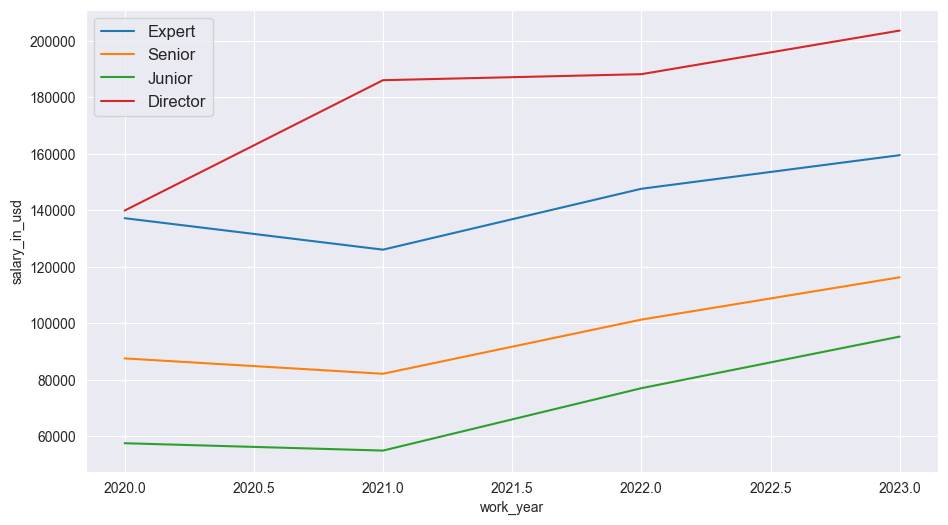

In [22]:
plt.figure(figsize=(11,6))

sns.set_style('darkgrid')
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=original_df, ci=None)

plt.legend(fontsize=12)
plt.show()

- `Job` 분포 

In [23]:
total = len(original_df)
job_per = original_df['jobs'].value_counts().apply(lambda x : round(x/total * 100,2))
job_per=job_per[:10]

fig = px.bar(y= job_per.values,
             x = job_per.index,
             color= job_per.index,
             color_discrete_sequence=px.colors.qualitative.G10,
             text = job_per.values,
             title='Top10 Jobs',
             template='ggplot2'
             )

fig.update_layout(
    title_text='Job Distribution(%)',  
    height=650,  
    xaxis_title="Job Titles", 
    yaxis_title="Count",  
    font=dict(size=17, family="Franklin Gothic") 
)

fig.show()

In [24]:
total = len(original_df)
job_per = original_df['jobs'].value_counts().apply(lambda x : round(x/total * 100,2))
job_per=job_per.astype(str)+'%'

In [25]:
job_per

jobs
데이터 엔지니어           32.17%
데이터 사이언티스트         27.91%
비즈니스 인텔리전스 및 분석     18.7%
머신 러닝 엔지니어         10.68%
데이터 전략가 및 리더        3.04%
데이터 아키텍터            2.72%
머신러닝 엔지니어           1.28%
인공 지능 개발자           0.77%
컴퓨터 비전(CV) 종사자      0.72%
데이터 관리 및 운영         0.64%
데이터 분석가             0.56%
빅 데이터 분석가           0.35%
딥 러닝 엔지니어           0.19%
자연어 처리 및 음성 처리      0.19%
자율 주행 자동차 엔지니어      0.05%
인사이트 분석             0.05%
Name: count, dtype: object

In [26]:
avg_sal = original_df.groupby('jobs')['salary_in_usd'].mean().apply(lambda x : round(x,2))
avg_sal= avg_sal.sort_values( ascending=False)[:10]

sal_per = pd.DataFrame(avg_sal).join(job_per)

fig = px.bar(y= sal_per['salary_in_usd'],
             x = sal_per.index,
             color= sal_per.index,
             color_discrete_sequence=px.colors.qualitative.G10,
             text = sal_per['count'],
             title='Top10 Jobs - Salary',
             template='ggplot2'
             )

fig.update_layout(
    title_text='Job Ratio-Salary',
    height=650,     
    xaxis_title="Job Titles",  
    yaxis_title="Salary",  
    font=dict(size=17, family="Franklin Gothic")  
)

fig.show()


# 전 세계 기준

- 각 변수 별 평균 Salary

검은 실선은 Salary 분포를 나타냄

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCours

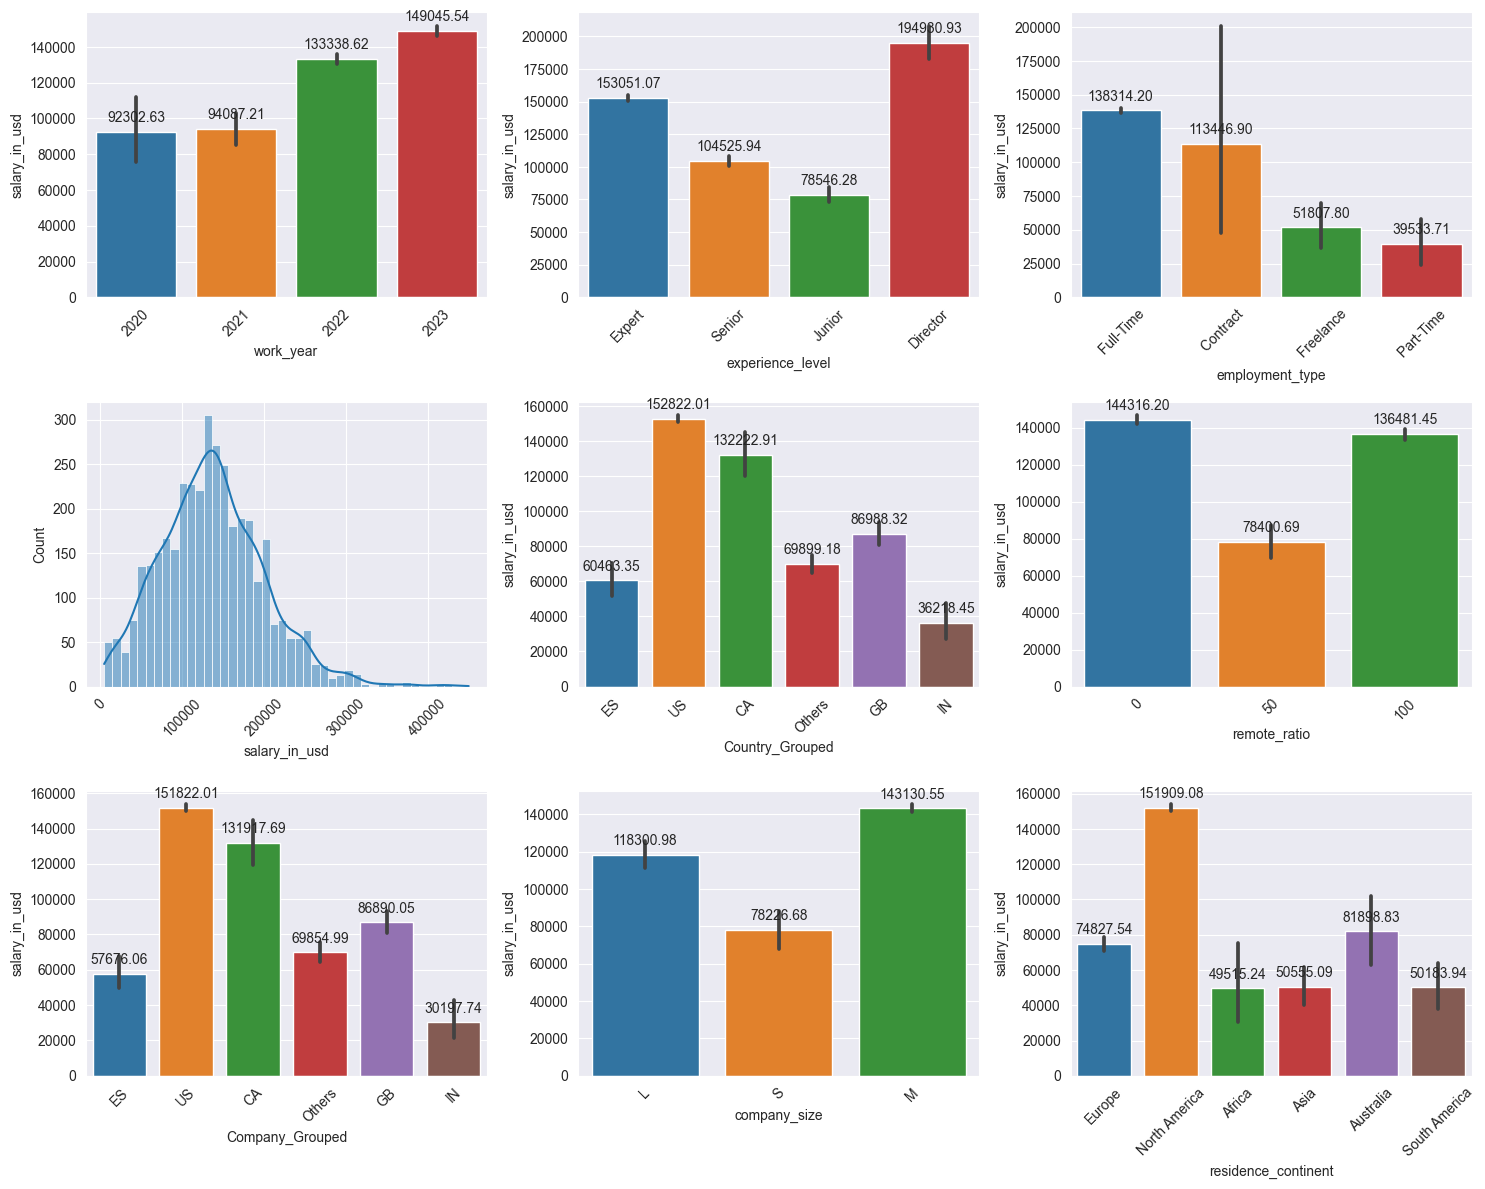

In [27]:
fig, ax = plt.subplots(3,3, figsize=(15,12))

for row in ax:
    for subplot in row:
        subplot.tick_params(axis='x', labelrotation=45)
        
sns.barplot(original_df, y='salary_in_usd',x='work_year', ax=ax[0,0])
sns.barplot(original_df, y='salary_in_usd',x='experience_level', ax=ax[0,1])
sns.barplot(original_df, y='salary_in_usd',x='employment_type', ax=ax[0,2])
sns.histplot(original_df, x='salary_in_usd', kde=True, ax=ax[1,0])

sns.barplot(original_df, y='salary_in_usd',x='Country_Grouped', ax=ax[1,1])
sns.barplot(original_df, y='salary_in_usd',x='remote_ratio', ax=ax[1,2])
sns.barplot(original_df, y='salary_in_usd',x='Company_Grouped', ax=ax[2,0])
sns.barplot(original_df, y='salary_in_usd',x='company_size', ax=ax[2,1])
sns.barplot(original_df, y='salary_in_usd',x='residence_continent', ax=ax[2,2])

for i in range(3):
    for j in range(3):
        if (i, j) != (1, 0):
            for p in ax[i, j].patches:
                ax[i, j].annotate(format(p.get_height(), '.2f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha='center', va='center', 
                                  xytext=(0, 10), 
                                  textcoords='offset points')

plt.tight_layout()
plt.show()

- company 나라별 수령 연봉

In [28]:
original_df['company_location'] = coco.convert(original_df['employee_residence'], to='ISO3')
company_salary = original_df.groupby('company_location')['salary_in_usd'].mean()
company_salary.index

Index(['ARE', 'ARG', 'ARM', 'ASM', 'AUS', 'AUT', 'BEL', 'BGR', 'BIH', 'BOL',
       'BRA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CYP', 'CZE',
       'DEU', 'DNK', 'DOM', 'DZA', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR',
       'GHA', 'GRC', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISR', 'ITA', 'JEY', 'JPN', 'KEN', 'KWT', 'LTU', 'LUX', 'LVA',
       'MAR', 'MDA', 'MEX', 'MKD', 'MLT', 'MYS', 'NGA', 'NLD', 'NZL', 'PAK',
       'PHL', 'POL', 'PRI', 'PRT', 'ROU', 'RUS', 'SGP', 'SRB', 'SVK', 'SVN',
       'SWE', 'THA', 'TUN', 'TUR', 'UKR', 'USA', 'UZB', 'VNM'],
      dtype='object', name='company_location')

In [29]:
fig = px.choropleth(locations=company_salary.index,
                    color=company_salary.values,
                    hover_name= company_salary.index,
        
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    title='Company Location - Mean Salary Distribution Map')

fig.show()

- appendix1. experience_level 연봉 비율

/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_83266/1073798985.py:5: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_83266/1073798985.py:6: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but p

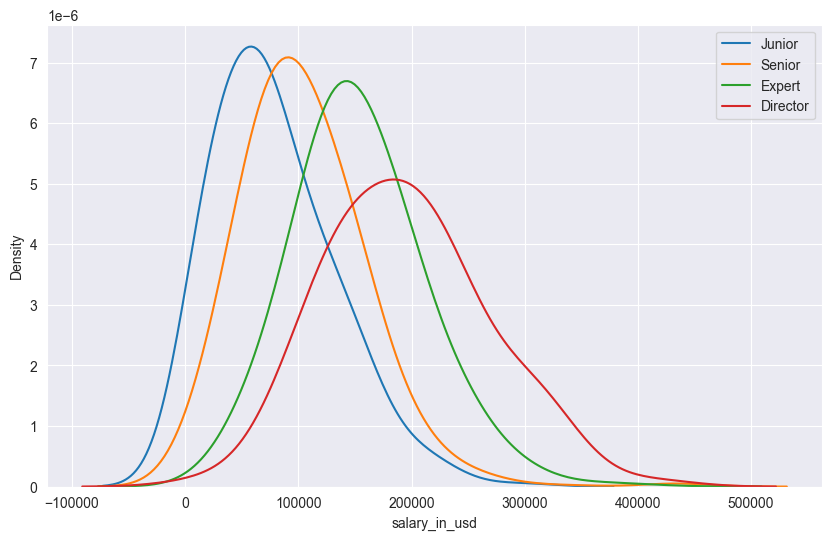

In [30]:
exp_idx = original_df.experience_level.unique()

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.kdeplot(original_df['salary_in_usd'][original_df.experience_level == 'Junior'] , bw=.5)
sns.kdeplot(original_df['salary_in_usd'][original_df.experience_level == 'Senior'], bw=.5)
sns.kdeplot(original_df['salary_in_usd'][original_df.experience_level == 'Expert'], bw=.5)
sns.kdeplot(original_df['salary_in_usd'][original_df.experience_level == 'Director'], bw=.5)

plt.legend(['Junior','Senior','Expert','Director'])
plt.show()

- appendix 2.`experience_level`별 `company_size`에 따른 연봉 분포

In [31]:
fig = px.box(original_df, x='experience_level', y='salary_in_usd', color='company_size', height=600, width=1100)

fig.show()

# 결론
- 아시아의 데이터 분야 연봉 평균 500000$ $\to$ 한화 : 6700만원
- 특정년도(2020~2023)에서 Salary가 전반적으로 증가하는 추이
- all 재택인 직장도 재택 없는 직장부럽지 않는 연봉을 수령

- 연봉 

    - 정규직 > 계약직 > 프리랜서 > 아르바이트
    - Junior 평균 78546$, Asia에서 Junior연봉 평균 40000$, 한화 약 5000만원
    - 'US'(미국) > 'CA'(캐나다) > 'GB'(영국) > 기타 > 'ES'(스페인) > 'IN'(인도)
    - 회사 size : M > L > S

<body>
    <div style="padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center":><h2> 🔎 Correlation</h2></div>
</body>


- object column에 대한 라벨링

In [32]:
from sklearn.preprocessing import LabelEncoder 

labeled_df = original_df
obj_cols = labeled_df.select_dtypes(['object']).columns

le = LabelEncoder()
for col in obj_cols:
    labeled_df[col] = le.fit_transform(labeled_df[col])

labeled_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,jobs,residence_continent,Country_Grouped,Company_Grouped
0,2023,1,2,84,85847,25,100,25,0,2,3,1,1
1,2023,3,0,66,30000,75,100,75,2,7,4,5,5
2,2023,3,0,66,25500,75,100,75,2,7,4,5,5
3,2023,1,2,47,175000,12,100,12,1,2,4,0,0
4,2023,1,2,47,120000,12,100,12,1,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,1,2,47,412000,75,100,75,0,2,4,5,5
3751,2021,3,2,84,151000,75,100,75,0,2,4,5,5
3752,2020,2,2,47,105000,75,100,75,2,2,4,5,5
3753,2020,2,0,17,100000,75,100,75,0,9,4,5,5


In [33]:
labeled_df.corr()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,jobs,residence_continent,Country_Grouped,Company_Grouped
work_year,1.000000,-0.169140,0.011127,-0.026862,0.228290,0.245540,-0.236430,0.245540,0.138875,0.003299,0.262525,0.155913,0.149001
experience_level,-0.169140,1.000000,-0.017891,0.008694,-0.386295,-0.288604,0.016071,-0.288604,-0.050578,0.117973,-0.265130,-0.219628,-0.203907
employment_type,0.011127,-0.017891,1.000000,-0.052231,-0.010329,-0.024272,-0.028673,-0.024272,-0.041001,-0.010156,0.014749,-0.010671,-0.019294
job_title,-0.026862,0.008694,-0.052231,1.000000,0.120875,-0.063736,-0.042451,-0.063736,0.002548,-0.224176,-0.056264,-0.060944,-0.068056
salary_in_usd,0.228290,-0.386295,-0.010329,0.120875,1.000000,0.418217,-0.064171,0.418217,-0.000372,-0.164607,0.408176,0.339320,0.328554
employee_residence,0.245540,-0.288604,-0.024272,-0.063736,0.418217,1.000000,-0.083996,1.000000,0.034258,-0.064974,0.520935,0.853911,0.824974
remote_ratio,-0.236430,0.016071,-0.028673,-0.042451,-0.064171,-0.083996,1.000000,-0.083996,-0.036928,-0.001840,-0.073581,-0.044276,-0.035722
company_location,0.245540,-0.288604,-0.024272,-0.063736,0.418217,1.000000,-0.083996,1.000000,0.034258,-0.064974,0.520935,0.853911,0.824974
company_size,0.138875,-0.050578,-0.041001,0.002548,-0.000372,0.034258,-0.036928,0.034258,1.000000,0.087792,0.068210,0.043867,0.048839
jobs,0.003299,0.117973,-0.010156,-0.224176,-0.164607,-0.064974,-0.001840,-0.064974,0.087792,1.000000,-0.052133,-0.039668,-0.034930


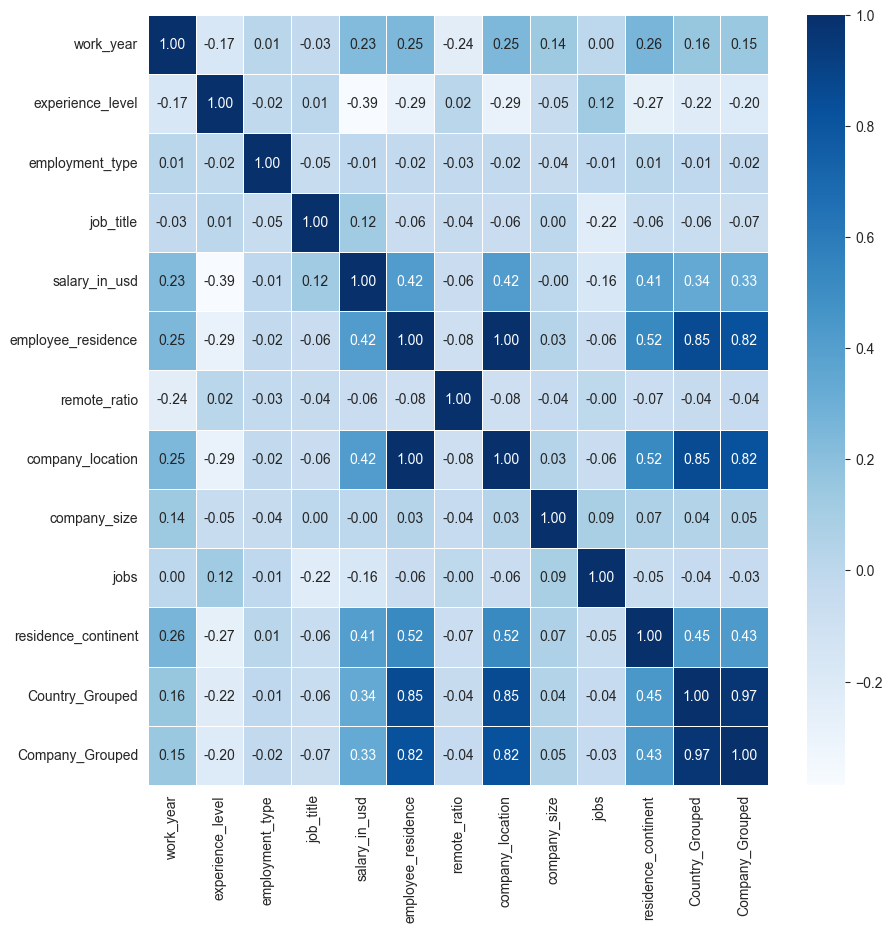

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(labeled_df.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

<body>
    <div style="padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center":><h2> 💵 Salary Predict Model</h2></div>
</body>


- 만약 사용할거면 이 부분은 좀 더 고민해봐야 합니다.
- 다양한 모델을 시도해보지 못했습니다.

In [35]:
# %pip install xgboost
# %pip install country_converter
# %pip install catboost

In [36]:
#Model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

In [37]:
features = ['experience_level','employment_type','jobs','residence_continent','remote_ratio','Country_Grouped','company_size']
X = original_df[features]
y = original_df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
train_pool = Pool(X_train, label=y_train, cat_features=features)
test_pool = Pool(X_test, label=y_test, cat_features=features)
cat = CatBoostRegressor(iterations=5000, learning_rate=0.01, depth=4, cat_features=features, verbose=200)
grid = {
    'depth':[4,6,8],
    'learning_rate':[0.01,0.03,0.001]
}
cat.grid_search(grid, train_pool, verbose=200, plot=False, refit=True)
y_pred = cat.predict(test_pool)

0:	learn: 149406.4443000	test: 153883.6725736	best: 153883.6725736 (0)	total: 62.9ms	remaining: 5m 14s
200:	learn: 54969.5111445	test: 54724.0759132	best: 54724.0759132 (200)	total: 798ms	remaining: 19.1s
400:	learn: 49853.1204962	test: 49438.0906442	best: 49438.0906442 (400)	total: 1.4s	remaining: 16s
600:	learn: 49016.4864564	test: 48883.9306156	best: 48883.9306156 (600)	total: 2.23s	remaining: 16.3s
800:	learn: 48526.5642090	test: 48729.8804223	best: 48729.8804223 (800)	total: 3.21s	remaining: 16.8s
1000:	learn: 48170.0313496	test: 48637.8942577	best: 48637.3887474 (997)	total: 4.27s	remaining: 17.1s
1200:	learn: 47891.5086205	test: 48579.6526889	best: 48579.3659588 (1194)	total: 5.28s	remaining: 16.7s
1400:	learn: 47641.0365517	test: 48535.1011404	best: 48535.0670162 (1399)	total: 5.94s	remaining: 15.3s
1600:	learn: 47395.5828976	test: 48521.7459924	best: 48516.0283448 (1476)	total: 6.72s	remaining: 14.3s
1800:	learn: 47163.5573873	test: 48500.4361861	best: 48497.1147916 (1756)	tot

In [39]:
print('Depth:', cat.get_all_params()['depth'])
print('Learning Rate:',cat.get_all_params()['learning_rate'])

Depth: 8
Learning Rate: 0.029999999329447743


In [40]:
imp = cat.get_feature_importance()
pd.DataFrame(imp, index=features, columns=['Importance'])

,Importance
experience_level,18.982593
employment_type,6.129514
jobs,26.612166
residence_continent,12.679045
remote_ratio,13.541470
Country_Grouped,13.005514
company_size,9.049699


In [41]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
salary_std = y_test.std()
rmse/salary_std

0.8177451180024891

- 아시아 회사에서 junior로 데이터사이언티스트 정규직으로 대기업에 취업하기. 풀 재직근무 가능

In [42]:
test = pd.DataFrame({'experience_level':['EN'],
                     'employment_type':['FT'],
                     'jobs':['머신러닝 엔지니어'],
                     'residence_continent':['Asia'],
                     'remote_ratio': [100],
                     'Country_Grouped':['Others'],
                     'company_size':['L']})
test

,experience_level,employment_type,jobs,residence_continent,remote_ratio,Country_Grouped,company_size
0,EN,FT,머신러닝 엔지니어,Asia,100,Others,L


In [43]:

new_data_pool = Pool(test, cat_features=features)
new_pred = cat.predict(test)
print(f"the estimated salary would be:{new_pred}")

the estimated salary would be:[98321.216285]


In [44]:
round(new_pred[0]*(1327.08))

130480120

In [45]:
import joblib

# 모델 객체 (예: clf는 scikit-learn 모델 객체)
model = cat

# 모델을 .pkl 파일로 저장
joblib.dump(model, 'model.pkl')


['model.pkl']